# 1. 问题1

## 1.1. 基础

- 阿基米德螺旋线

极坐标：

\begin{cases}
r = \sqrt{x^2 + y^2} = a + b \theta  \\
\theta = \arctan \cfrac{y}{x} \\
\end{cases}

直角坐标：

\begin{cases}
x = r(\theta) \cos \theta = (a + b \theta) \cos \theta \\
y = r(\theta) \sin \theta = (a + b \theta) \sin \theta \\
\end{cases}

- 等距螺线

顺时针：初始点离原点距离 $a = r_0 = 0$, 螺距 $b = \frac{p}{2\pi}$, 螺距 $p (m)$, 角度 $\theta \in [0, 16 \cdot 2 \pi]$, $\theta = 0$ 在原点

逆时针：$a = 16 p$，$\theta^* = 16 \cdot 2 \pi - \theta$

极坐标：

$$\begin{cases}
r = b \theta  \\
\theta \\
\end{cases}$$

直角坐标（顺时针、逆时针）：

$$\begin{cases}
x = b \theta \cos \theta\\
y = b \theta \sin \theta
\end{cases}$$

一阶导：

$$\begin{cases}
r' = b \\
\theta' = 1
\end{cases}$$

$$\begin{cases}
x' = b \left(\cos\theta -\theta \sin\theta \right) \\
y' = b \left(\sin\theta +\theta \cos\theta \right) \\
\end{cases}$$

二阶导：

$$\begin{cases}
x'' &= b \left(- \sin\theta - \sin\theta -\theta \cos\theta \right) \\
&= - b \left(2 \sin\theta + \theta \cos\theta \right) \\
y'' &= b \left(\cos\theta + \cos\theta -\theta \sin\theta \right) \\
&= b \left(2 \cos\theta + \theta \sin\theta \right) \\
\end{cases}$$

$$\begin{cases}
r'' = 0 \\
\theta'' = 0 \\
\end{cases}$$

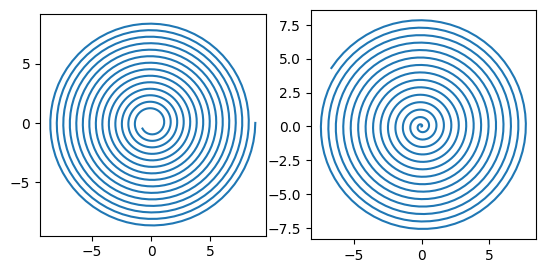

In [1]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(10, 16 * 2 * np.pi, 1000)

# 盘入/往里走/顺时针
a = 0
b = 0.55 / (2 * np.pi)
x = (a + b *theta) * np.cos(theta)
y = (a + b *theta) * np.sin(theta)
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.gca().set_aspect('equal')

# 盘出/往外走/逆时针
a = 16 * 0.55
b = 0.55 / (2 * np.pi)
x = (a - b * theta) * np.cos(-theta)
y = (a - b * theta) * np.sin(-theta)
plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.gca().set_aspect('equal')
plt.show()

## 1.2. 位置和时间的关系

等距螺线弧长：

$$\begin{align*}
l_s(\theta_1, \theta_2, b) &= \int_{\theta_1}^{\theta_2} \sqrt{r^2 + (\frac{dr}{d\theta})^2} d\theta \\
&= \int_{\theta_1}^{\theta_2} \sqrt{(b\theta)^2 + \theta^2} d\theta \\
&= b \int_{\theta_1}^{\theta_2} \sqrt{1 + \theta^2} d\theta \\
\end{align*}$$

$$L_s = l_s(0, 16 \cdot 2\pi, \frac{p}{2\pi})$$

时间与角度的关系：

$$\begin{align*}
ds &= \sqrt{x'^2 + y'^2} d \theta \\
&= b \sqrt{\left(\cos\theta -\theta \sin\theta \right)^2 + \left(\sin\theta +\theta \cos\theta \right)^2} d \theta \\
&= b \sqrt{1 + \theta^2} d \theta \\
&= v dt \\
\end{align*}$$

角度（常微分方程求解, 或者拟合曲线）：

$$\begin{align*}
\theta' \sqrt{1 + \theta^2} = \frac{v}{b} \\
\end{align*}$$

$$\theta = \theta(t)$$

时间：

时间 $t \in [0, \cfrac{L_s}{v}], \begin{cases}t: 0 \to \cfrac{L_s}{v}\\ \theta: 16 \cdot 2\pi \to 0\end{cases}$, 当 $t = T_0 = 0$ 时, 龙头刚好进入螺线, 此时角度 $\theta = \Theta_0 = 16 \cdot 2 \pi$

$$\begin{align*}
t' = \frac{b}{v} \sqrt{1 + \theta^2} \\
\end{align*}$$

$$\begin{align*}
t &= \int_{\theta}^{\theta_0} \frac{b}{v} \sqrt{1 + \theta^2} d \theta \\
&= t(\theta_0) - t(\theta) \\
\end{align*}$$

$$\begin{align*}
t(\theta) &= \frac{b}{v} \frac12 \left(\theta \sqrt{1 + \theta^2} + \sinh^{-1}\theta\right) \\
&= \frac{b}{v} \frac12 \left(\log \left(\theta + \sqrt{1 + \theta^2} \right) + \theta \sqrt{1 + \theta^2}\right) \\
\end{align*}$$

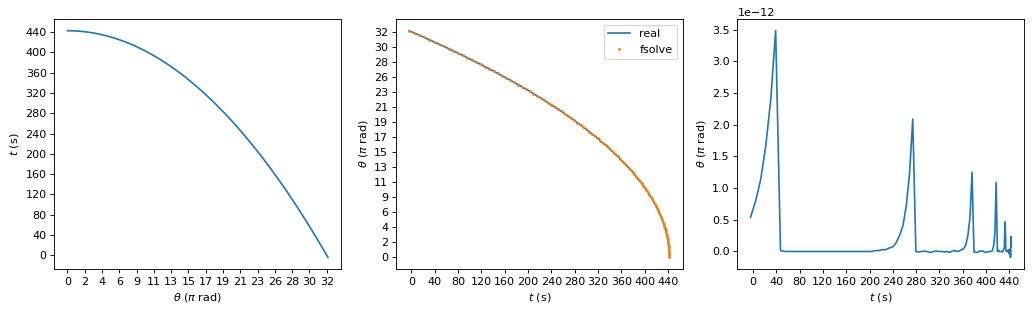

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize  import fsolve
from numba import jit

v = 1
p = 0.55
b = p / (2 * np.pi)
step = 1

def func_t_(theta): 
    return (b / v) * 0.5 * (np.log(theta + (1 + theta**2)**0.5) + theta * (1 + theta**2)**0.5)

def func_t(theta):
    return func_t_(16*2*np.pi) - func_t_(theta)

def func_theta(t):
    if isinstance(t, (int, float)):
        return fsolve(lambda theta: func_t(theta) - t, 221)[0]
    return np.array([fsolve(lambda theta: func_t(theta) - t_, 221)[0] for t_ in t])

theta = np.arange(0, 16 * 2 * np.pi + step, step)
t_theta = func_t(theta)
t = t_theta
theta_t = func_theta(t)

plt.figure(figsize=(13, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.plot(theta, t_theta)
plt.xlabel('$\\theta$ ($\\pi$ rad)')
plt.ylabel('$t$ (s)')
x = np.linspace(0, 16 * 2 * np.pi, 16)
plt.xticks(x, labels=map(lambda x: 0 if x == 0 else f"{x/np.pi:.0f}", x))
plt.yticks(np.arange(0, t_theta.max(), 40))

plt.subplot(1, 3, 2)
plt.plot(t_theta, theta, '-', label='real')
plt.plot(t, theta_t, '.', markersize=3, label='fsolve')
plt.xlabel('$t$ (s)')
plt.ylabel('$\\theta$ ($\\pi$ rad)')
y = np.linspace(0, 16 * 2 * np.pi, 16)
plt.yticks(y, labels=map(lambda x: 0 if x == 0 else f"{x/np.pi:.0f}", y))
plt.xticks(np.arange(0, t_theta.max(), 40))
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t_theta, theta_t - theta)
plt.xlabel('$t$ (s)')
plt.ylabel('$\\theta$ ($\\pi$ rad)')
plt.xticks(np.arange(0, t_theta.max(), 40))

plt.tight_layout()
plt.show()

已知前一把手的位置 $p_i = (x_i, y_i)$, 推导下一把手 $p_{i+1} = (x_{i+1}, y_{i+1})$ 的位置：

把手位置可以用时间表示，因此可以将时间视为变量进行求解，即已知 $t_i$ 求解 $t_{i+1}$

$$\begin{cases}
p_i &= \left(b \theta(t_i) \cos \theta(t_i), b \theta(t_i) \sin \theta(t_i) \right) \\
p_{i+1} &= \left(b \theta(t_{i+1}) \cos \theta(t_{i+1}), b \theta(t_{i+1}) \sin \theta(t_{i+1}) \right) \\
d &= \sqrt{(x_i - x_{i+1})^2 + (y_i - y_{i+1})^2} \\
\end{cases}$$

其中, $d$ 表示两把手之间的距离

## 1.3. 速度和时间的关系

等距螺线上的任一点的斜率（切线方向）：

>顺时针螺线从外向内运动的斜率与逆时针螺线方向相反，数值相等。如果使用 $\arctan$ 计算角度，二者结果一样（等于逆时针的结果），因此需要使用 $\text{arctan2}$ 计算，进一步由于二者方向相反，所以需要对横纵坐标取其相反数。

$$k(t) = \frac{-dy}{-dx} 
= \frac{-\cfrac{dy}{d \theta}}{-\cfrac{dx}{d\theta}}
= \frac{-y'}{-x'}
= \frac{-1}{-1} \frac{\sin\theta +\theta \cos\theta}{\cos\theta - \theta \sin\theta }, \theta = \theta(t)$$

已知前后把手的位置 $p_i, p_{i+1}$，等距螺线上的第 $i+1$ 个板凳斜率：

$$k_{i+1} = \cfrac{y_i - y_{i+1}}{x_i - x_{i+1}}$$

计算下一个把手的速度：

$$\begin{align*}
\alpha_i &= \left| \text{arctan2}\left( k(t_i) \right) - \text{arctan2}\left( k_{i+1} \right) \right| \\
\alpha_{i+1} &= \left| \text{arctan2}\left( k(t_{i+1} )\right) - \text{arctan2}\left( k_{i+1} \right) \right| \\
v_{i+1} &= \frac{\cos\alpha_i}{\cos\alpha_{i+1}} v_i \\
\end{align*}$$


In [3]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize  import fsolve, minimize
from scipy.integrate import quad
from functools import lru_cache

v = 1
p = 0.55
b = p / (2 * np.pi)
step = 0.01

def func_t_(theta): 
    return (b / v) * 0.5 * (np.log(theta + (1 + theta**2)**0.5) + theta * (1 + theta**2)**0.5)

def func_t(theta):
    return func_t_(16*2*np.pi) - func_t_(theta)

def func_ls(th1, th2, b):
    integrand = lambda theta: np.sqrt(1 + theta**2)
    arc_length, _ = quad(integrand, th1, th2)
    arc_length *= b
    return arc_length

Ls = func_ls(0, 16*2*np.pi, b)

def func_theta(t):
    if isinstance(t, (int, float, np.int64, np.float64)):
        return fsolve(lambda theta: func_t(theta) - t, 221)[0]
    return np.array([fsolve(lambda theta: func_t(theta) - t_, 221)[0] for t_ in t])

def func_k2(t=None, theta=None):
    theta = func_theta(t) if theta is None else theta
    x_ = np.cos(theta) - theta * np.sin(theta)
    y_ = np.sin(theta) + theta * np.cos(theta)
    return -y_, -x_

def func_k(t=None, theta=None):
    k = func_k2(t, theta)
    return k[0] / k[1]

def func_v(v0, xy, kt):
    vs = [v0]
    pre_at_kt = np.arctan2(*kt[0])
    pre_x, pre_y = xy[0]
    pre_at_k = np.arctan2(pre_y - xy[1][1], pre_x - xy[1][0])
    pre_v = v0
    pre_alpha = abs(pre_at_kt - pre_at_k)
    for (now_x, now_y), (k1, k2) in zip(xy[1:], kt[1:]):
        now_at_kt = np.arctan2(k1, k2)
        now_at_k = np.arctan2(pre_y - now_y, pre_x - now_x)
        now_alpha = abs(now_at_kt - now_at_k)
        now_v = pre_v * np.cos(pre_alpha) / np.cos(now_alpha)
        vs.append(now_v)
        pre_x, pre_y, pre_alpha, pre_v = now_x, now_y, now_alpha, now_v
    return np.array(vs)

def S0(t=None, theta=None):
    theta = func_theta(t) if theta is None else theta
    x = b * theta * np.cos(theta)
    y = b * theta * np.sin(theta)
    return np.stack((x, y)), theta

def get_dragon_body(th, xy, t, i):
    assert isinstance(i, (int, np.int64)) and 1 < i < 225, "i must be int and in (1, 224), but get {}".format(i)
    d = 2.86 if i == 2 else 1.65  # 341-55, 220-55

    # # 1 X
    # def func(t):
    #     x, y = S0(t)[0]
    #     return abs((x - xy[0])**2 + (y - xy[1])**2 - d**2)
    #     # return abs(((x - xy[0])**2 + (y - xy[1])**2)**0.5 - d)
    # t_ = minimize(func, t, bounds=[(t-2, t)]).x[0]
    # return S0(t_)

    # # 2 X
    # def func(t):
    #     x, y = S0(t)[0]
    #     return (x - xy[0])**2 + (y - xy[1])**2 - d**2
    #     # return ((x - xy[0])**2 + (y - xy[1])**2)**0.5 - d
    # t_ = fsolve(func, t)[0]
    # return S0(t_)

    # 3 V
    def func(theta):
        x, y = S0(None, theta)[0]
        # return (x - xy[0])**2 + (y - xy[1])**2 - d**2
        return ((x - xy[0])**2 + (y - xy[1])**2)**0.5 - d
    theta_ = fsolve(func, th)[0]
    return S0(None, theta_)

In [4]:
sites = 224
step = 1
time_begin = 0
time_size = 440
time_max = time_begin + time_size
time_range = np.arange(time_begin, time_max, step)
site_range = np.arange(1, sites+1)
info_th = np.zeros((sites, len(time_range)))  # theta
info_kt = np.zeros((sites, len(time_range), 2)) # kt
info_xy = np.zeros((sites, len(time_range), 2))  # xy
info_k = np.zeros((sites, len(time_range), 2))  # k
info_at_kt = np.zeros((sites, len(time_range)))  # arctan2(kt)
info_at_k = np.zeros((sites, len(time_range)))  # arctan2(k)
info_alpha = np.zeros((sites, len(time_range)))  # alpha
info_v = np.zeros((sites, len(time_range)))  # v
info_th.fill(np.nan)
info_kt.fill(np.nan)
info_xy.fill(np.nan)
info_k.fill(np.nan)
info_at_kt.fill(np.nan)
info_at_k.fill(np.nan)
info_alpha.fill(np.nan)
info_v.fill(np.nan)

In [5]:
for t_idx, t in enumerate(tqdm.tqdm(time_range)):
    pre_xy = pre_kt = None
    now_xy = now_kt = None
    for i_idx, i in enumerate(site_range):
        if i == 1:
            info_v[i_idx, t_idx] = now_v = v
            now_xy, now_th = S0(t)  # 位置
            info_th[i_idx, t_idx] = now_th
            info_xy[i_idx, t_idx] = now_xy  # 位置
            info_kt[i_idx, t_idx] = now_kt = func_k2(t)  # 切向斜率
            info_at_kt[i_idx, t_idx] = now_at_kt = np.arctan2(*now_kt)  # 切向斜率的角度
            info_k[i_idx, t_idx] = now_k = 0  # 斜率
            info_at_k[i_idx, t_idx] = now_at_k = 0  # 斜率的角度
            info_alpha[i_idx, t_idx] = now_alpha = 0  # 两斜率夹角
        else:
            now_xy, now_th = get_dragon_body(pre_th, pre_xy, t, i)
            if now_th > 16 * 2 * np.pi:
                break
            info_th[i_idx, t_idx] = now_th
            info_xy[i_idx, t_idx] = now_xy
            info_kt[i_idx, t_idx] = now_kt = func_k2(None, now_th)  # get_dragon_kt2(now_xy)
            info_at_kt[i_idx, t_idx] = now_at_kt = np.arctan2(*now_kt)
            info_k[i_idx, t_idx] = now_k = (pre_xy[1]-now_xy[1], pre_xy[0]-now_xy[0])
            info_at_k[i_idx, t_idx] = now_at_k = np.arctan2(*now_k)
            info_alpha[i_idx, t_idx] = now_alpha = abs(now_at_kt - now_at_k)
            if i == 2:
                info_k[i_idx, t_idx] = pre_k = now_k
                info_at_k[i_idx, t_idx] = pre_at_k = now_at_k
                info_alpha[i_idx-1, t_idx] = pre_alpha = now_alpha
            info_v[i_idx, t_idx] = now_v = pre_v * np.cos(pre_alpha) / np.cos(now_alpha)
        pre_th, pre_xy, pre_kt, pre_k, pre_alpha, pre_v = \
            now_th, now_xy, now_kt, now_k, now_alpha, now_v

 98%|█████████▊| 430/440 [00:06<00:00, 38.48it/s] /tmp/ipykernel_1623862/2911381393.py:89: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  theta_ = fsolve(func, th)[0]
100%|██████████| 440/440 [00:06<00:00, 65.65it/s]


In [6]:
info_v_max = np.nan_to_num(info_v, 0).max()
row_idx, col_idx = np.where(info_v == info_v_max)
v_max_idx = np.stack((row_idx, col_idx)).T
v_max_idx

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [  1, 437],
       [  1, 438],
       [  1, 439]])

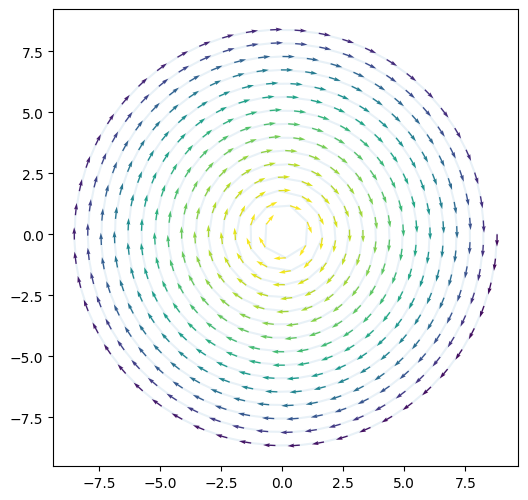

In [7]:
def plot_head():
    head_idx = 0
    X, Y = info_xy[head_idx, :].T
    U = info_v[head_idx, :] * np.cos(info_at_kt[head_idx, :])
    V = info_v[head_idx, :] * np.sin(info_at_kt[head_idx, :])
    C = np.arange(time_size)

    plt.plot(X, Y, alpha=0.1)
    plt.quiver(X, Y, U, V, C)
    plt.gca().set_aspect('equal')
    return

plt.figure(figsize=(6, 6))
plot_head()

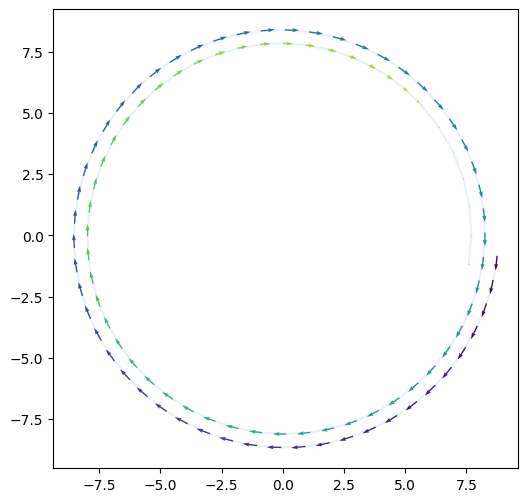

In [8]:
def plot_body(i_idx=None, i=None):
    assert i_idx is not None or i is not None
    if i_idx is None:
        # if i is not None:
        i_mask = site_range == i
        if i_mask.any():
            i_idx = np.argmax(i_mask)
        else:
            raise ValueError(f'i = {i} is not in site range')

    X, Y = info_xy[i_idx, :].T
    U = info_v[i_idx, :] * np.cos(info_at_kt[i_idx, :])
    V = info_v[i_idx, :] * np.sin(info_at_kt[i_idx, :])
    C = np.arange(time_size)

    plt.plot(X, Y, alpha=0.1)
    plt.quiver(X, Y, U, V, C)
    plt.gca().set_aspect('equal')
    return

plt.figure(figsize=(6, 6))
plot_body(i_idx=200)

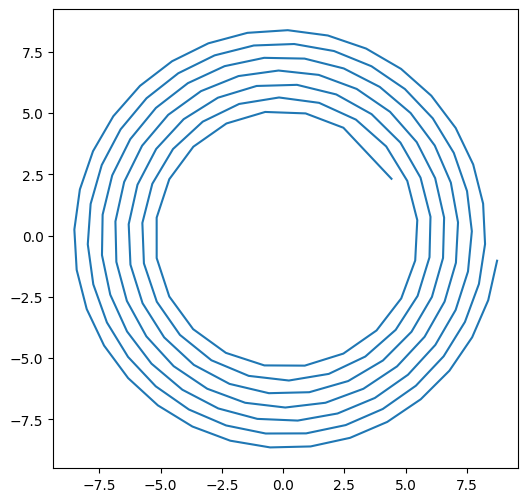

In [9]:
def plot_dragon_time(t_idx=-1, t=None):
    assert t_idx is not None or t is not None
    if t_idx is None:
        # if t is not None:
        t_mask = time_range == t
        if t_mask.any():
            t_idx = np.argmax(t_mask)
        else:
            raise ValueError(f't = {t} is not in time range')

    plt.plot(info_xy[:, t_idx, 0], info_xy[:, t_idx, 1])
    plt.gca().set_aspect('equal')
    return

plt.figure(figsize=(6, 6))
plot_dragon_time(None, t=300)

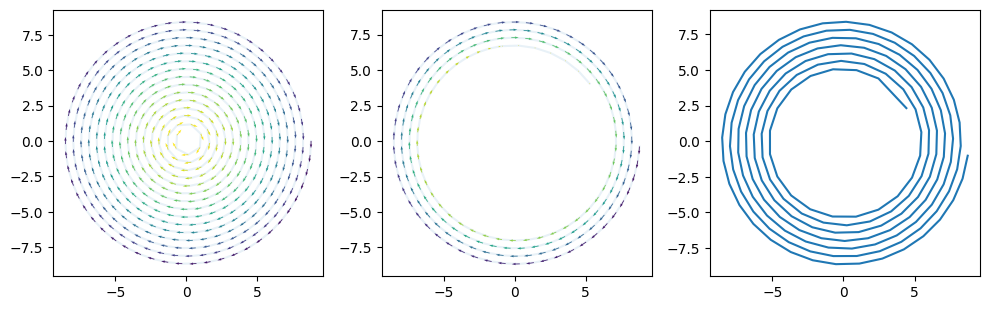

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plot_head()
plt.subplot(1, 3, 2)
plot_body(None, i=150)
plt.subplot(1, 3, 3)
plot_dragon_time(None, t=300)
plt.tight_layout()
plt.show()

# 2. 问题2

## 2.1. 约定

对于第 $i$ 个板凳来说，前后把手位置分别为 $p_i, p_{i+1}$，称左上角的顶点为点1，表示 $p_{i, 1} = (x_{i, 1}, y_{i, 1})$，（以板凳中心为旋转中心逆时针旋转）左下、右下、右上角顶点依次是点2、3、4，统称点1表示为板凳左上角的顶点，表示为 $p_1$，其余顶点同理。同时，约定前把手的孔中心距离板头最近的点为点 $p_{i,h} = (x_{i, h}, y_{i, h})$，后把手的孔中心距离板尾最近的点为点 $p_{i,t} = (x_{i, t}, y_{i, t})$。

已知第 $i$ 节板凳前后把手的位置 $p_i, p_{i+1}$，可以推导得四个顶点的位置/坐标：

另外，已知板宽 $d_{w} = 0.3 m$、板长 $d_{L} = 2.2 \text{ or } 3.41 m$，两孔的中心距离 $d_{l} = 2.2-0.55 \text{ or } 3.41-0.55 m$，孔的中心距离板凳的短边和长边的距离分别为 $d_{c1} = 0.275 m, d_{c2} = 0.15 m$，可以计算得到孔的中心距离板凳最近顶点距离为 $d_c = \sqrt{d_{c1}^2 + d_{c2}^2}$

>step1. 分别推导 $p_{i, h}, p_{i, t}$ 的坐标<br>
step2. 根据 $p_{i, h}, p_{i, t}$，分别推导 $p_{i, 1}, p_{i, 2}, p_{i, 3}, p_{i, 4}$ 的坐标<br>
step3. 根据 $p_{i}, p_{i, 1}$，推导 $p_{i, 1}$ 的角度

step1.

四个点的斜率、距离关系：

$$p_{i, h}, p_{i}, p_{i+1}, p_{i, t}\begin{cases}
d_{c1}^2 = (x_{i, h} - x_{i})^2 + (y_{i, h} - y_{i})^2 \\
d_{c1}^2 = (x_{i+1} - x_{i, t})^2 + (y_{i+1} - y_{i, t})^2 \\
k_{i+1} = \cfrac{y_{i, h} - y_{i}}{x_{i, h} - x_{i}} = \cfrac{y_{i} - y_{i+1}}{x_{i} - x_{i+1}} = \cfrac{y_{i+1} - y_{i, t}}{x_{i+1} - x_{i, t}} \\
x_{i, t} < x_{i+1} < x_{i} < x_{i, h} \text{ or } x_{i, t} > x_{i+1} > x_{i} > x_{i, h} \\
y_{i, t} < y_{i+1} < y_{i} < y_{i, h} \text{ or } y_{i, t} > y_{i+1} > y_{i} > y_{i, h} \\
\end{cases}$$

解得：

$$\begin{cases}
    p_{i, h} & \begin{cases}
    x_{i, h} = x_{i} + \text{sgn}(x_{i} - x_{i+1}) \cfrac{d_{c1}}{\sqrt{1 + k_{i+1}^2}} \\
    y_{i, h} = y_{i} + \text{sgn}(y_{i} - y_{i+1}) \cfrac{d_{c1}}{\sqrt{1 + k_{i+1}^2}} \\
    \end{cases} \\
    p_{i, t} & \begin{cases}
    x_{i, t} = x_{i} - \text{sgn}(x_{i} - x_{i+1}) \cfrac{d_{c1}}{\sqrt{1 + (\frac{1}{k_{i+1}})^2}} \\
    y_{i, t} = y_{i} - \text{sgn}(y_{i} - y_{i+1}) \cfrac{d_{c1}}{\sqrt{1 + (\frac{1}{k_{i+1}})^2}} \\
    \end{cases} \\
\end{cases}$$

step2.

同理根据六个点的斜率、距离关系，可以推导出四个顶点的坐标：

$$\begin{cases}
    p_{i, 1}, p_{i, h}, p_{i, 4} & \begin{cases}
        d_{c2}^2 = (x_{i, 1} - x_{i, h})^2 + (y_{i, 1} - y_{i, h})^2 \\
        d_{c2}^2 = (x_{i, h} - x_{i, 4})^2 + (y_{i, h} - y_{i, 4})^2 \\
        k_h = \cfrac{y_{i, 1} - y_{i, h}}{x_{i, 1} - x_{i, h}} = \cfrac{y_{i, h} - y_{i, 4}}{x_{i, h} - x_{i, 4}} = - \cfrac{1}{k_{i+1}} \\
        x_{i, 1} < x_{i, h} < x_{i, 4} \text{ or } x_{i, 1} > x_{i, h} > x_{i, 4} \\
        y_{i, 1} < y_{i, h} < y_{i, 4} \text{ or } y_{i, 1} > y_{i, h} > y_{i, 4} \\
        \end{cases} \\
    p_{i, 2}, p_{i, t}, p_{i, 4} & \begin{cases}
        d_{c2}^2 = (x_{i, 2} - x_{i, t})^2 + (y_{i, 2} - y_{i, t})^2 \\
        d_{c2}^2 = (x_{i, t} - x_{i, 4})^2 + (y_{i, t} - y_{i, 4})^2 \\
        k_t = \cfrac{y_{i, 2} - y_{i, t}}{x_{i, 2} - x_{i, t}} = \cfrac{y_{i, t} - y_{i, 4}}{x_{i, t} - x_{i, 4}} = - \cfrac{1}{k_{i+1}} \\
        x_{i, 2} < x_{i, t} < x_{i, 4} 	\text{ or } x_{i, 2} > x_{i, t} > x_{i, 4} \\
        y_{i, 2} < y_{i, t} < y_{i, 4} 	\text{ or } y_{i, 2} > y_{i, t} > y_{i, 4} \\
        \end{cases} \\
\end{cases}$$

$$\begin{cases}
    p_{i, 1} & \begin{cases}
        x_{i, 1} = x_{i, h} - \text{sgn}(y_{i} - y_{i+1}) \cfrac{d_{c2}}{\sqrt{1 + (\frac{1}{k_{i+1}})^2}} \\
        y_{i, 1} = y_{i, h} + \text{sgn}(x_{i} - x_{i+1}) \cfrac{d_{c2}}{\sqrt{1 + k_{i+1}^2}} \\
        \end{cases} \\
    p_{i, 2} & \begin{cases}
        x_{i, 2} = x_{i, t} - \text{sgn}(y_{i} - y_{i+1}) \cfrac{d_{c2}}{\sqrt{1 + (\frac{1}k_{i+1})^2}} \\
        y_{i, 2} = y_{i, t} + \text{sgn}(x_{i} - x_{i+1}) \cfrac{d_{c2}}{\sqrt{1 + k_{i+1}^2}} \\
        \end{cases} \\
    p_{i, 3} & \begin{cases}
        x_{i, 3} = x_{i, t} + \text{sgn}(y_{i} - y_{i+1}) \cfrac{d_{c2}}{\sqrt{1 + (\frac{1}k_{i+1})^2}} \\
        y_{i, 3} = y_{i, t} - \text{sgn}(x_{i} - x_{i+1}) \cfrac{d_{c2}}{\sqrt{1 + k_{i+1}^2}} \\
        \end{cases} \\
    p_{i, 4} & \begin{cases}
        x_{i, 4} = x_{i, h} + \text{sgn}(y_{i} - y_{i+1}) \cfrac{d_{c2}}{\sqrt{1 + (\frac{1}k_{i+1})^2}} \\
        y_{i, 4} = y_{i, h} - \text{sgn}(x_{i} - x_{i+1}) \cfrac{d_{c2}}{\sqrt{1 + k_{i+1}^2}} \\
        \end{cases} \\
\end{cases}$$

step3.

$$
\theta_1(t_i) = \theta(t_i) - \left| \text{arctan2} \frac{y_{i, 1}}{x_{i, 1}} - \text{arctan2} \frac{y_{i}}{x_{i}} \right| \\
$$

## 2.2. 碰撞检测

### 2.2.1. 最可能发生碰撞的板凳

龙头，证明见6.1

### 2.2.2. 最可能发生碰撞的板凳的点

内圈板凳的点1与外圈板凳的点3和4所连成的线段，并且有内圈点1的角度的值+$2 \pi$在外圈点3和4形成的角度范围之内，证明见6.2

### 2.2.3. 碰撞检测的判定

虽然最可能发生碰撞的点在龙头（猜的），但是还是建立通用的碰撞检测模型

>step1. 在 $t_i$ 时刻，可以计算出龙头的位置，并递推得到所有龙身前后把手的位置<br>
step2. 选取任意一个龙身，比如第 $i$ 个龙身，可得其位置信息 $p_{i}, p_{i+1}, p_{i,1}, p_{i,2}, p_{i,3}, p_{i,4}$ 和角度信息 $\theta_1(t_{i})$，称选取的该龙身所在圈为内圈<br>
step3. 假设碰撞发生在第 $j$ 个龙身，可得其位置信息 $p_{j}, p_{j+1}, p_{j,1}, p_{j,2}, p_{j,3}, p_{j,4}$ 和角度信息 $\theta(t_{j}), \theta(t_{j+1})$，满足：$\theta(t_{j}) < \theta_1(t_{i}) \le  \theta(t_{j+1})$，即可找到最可能发生碰撞的外圈的龙身<br>
step4. 检测内圈龙身点1是否在外圈龙身板凳所形成的矩形区域的范围之内，如果是，则发生碰撞，否则不发生碰撞；并计算点1到矩形区域的距离<br>

碰撞检测：

$$\text{is\_hit}(t) = \left( (\overrightarrow{p_{j, 1} p_{j, 2}} \times \overrightarrow{p_{j, 1} p_{i, 1}}) \cdot (\overrightarrow{p_{j, 3} p_{i, 1}} \times \overrightarrow{p_{j, 3} p_{j, 4}}) >= 0 \right) \land \left( (\overrightarrow{p_{j, 2} p_{j, 3}} \times \overrightarrow{p_{j, 2} p_{i, 1}}) \cdot (\overrightarrow{p_{j, 4} p_{i, 1}} \times \overrightarrow{p_{j, 4} p_{j, 1}}) >= 0 \right) \in \{0, 1\}$$

$\text{is\_hit}(t) = 0$ 表示 $t$ 时刻没有发生碰撞，$\text{is\_hit}(t) = 1$ 表示 $t$ 时刻发生碰撞


计算距离：

点到线距离公式：$$d_l(t) = \frac{Ax+By+C}{\sqrt{A^2+B^2}}$$

其中：$$\begin{align*}
A &= y_{j, 2} - y_{j, 1} \\
B &= x_{j, 1} - x_{j, 2} \\
C &= x_{j, 2} y_{j, 1} - x_{j, 1} y_{j, 2} \\
x &= x_{i, 1} \\
y &= y_{i, 1} \\
\end{align*}$$

最终碰撞距离表示：

$$d_p(t) = - \text{sgn}\left( \text{is\_hit}(t) - \frac12 \right) d_l(t)$$

### 2.2.4. 更多碰撞情况的讨论

1. 非龙头
2. 碰撞点2... 

# 3. 问题3

## 3.1.判定条件

假设两段圆弧半径分别为 $r_1 = 2 r_2, r_2$，掉头空间半径为 $r_3$，那么不发生碰撞的条件为：恰好在掉头空间半径处发生碰撞，即碰撞距离等于掉头空间半径

## 3.2.碰撞半径

$$r_{\text{hit}}(t) = b \theta(t) = \frac{p}{2 \pi} \theta(t), \text{ where } d_p(t) = 0$$

## 3.3.目标规划

$$\begin{align*}
\min_{p} & \left| r_{\text{hit}}(t) - r_3 \right|, t \in \left[0, \cfrac{l_s(0, 16 \cdot 2\pi, \frac{p}{2 \pi})}{v} \right] \\
\text{s.t.} & \begin{cases} t_i < t_{i+1} \end{cases} \\
\end{align*}
$$

# 4. 问题4

## 4.1.圆弧曲线的确定

假设：掉头空间只用于掉头，不用于盘入盘出

给定掉头空间半径，两圆弧半径、弧长可以唯一确定，即圆弧曲线可以唯一确定，证明见6.3

### 4.1.1.圆弧半径的确定

大小圆弧的圆周角相等、圆心角也相等，不妨设为 $\phi_1, \phi_2$，并且 $2 \phi_1 + \phi_2 = \pi$，通过构建合适的等腰三角形，使用余弦定理，有：

$$\begin{align*}
\cos\phi_1 &= \frac{(3r_2)^2 + (2r_3)^2 - (3r_2)^2}{2 (3 r_2) (2 r_3)} = \frac{r_3}{3 r_2} \\
\end{align*}$$

另外，圆周角还有以下关系：

$$\phi_1 = \left| \arctan(-\frac{1}{k_{i+1}}) - \arctan(\tan \theta_i) \right|, \text{ where } \theta_i = \frac{r_3}{b}, \text{i.e. } r(t_{i}) = r_3$$

所以：

$$r_2 = \frac{r_3}{3 \cos \phi_1} = \frac{r_3}{3 \cos \left( \left| \arctan(-\frac{1}{k_{i+1}}) - \arctan(\tan \theta_i) \right| \right)}$$

$$r_1 = 2 r_2$$

### 4.1.2.圆弧长度的确定

根据圆心角与弧长关系，有：

$$\begin{align*}l_2 &= \phi_2 r_2 \\
&= (\pi - 2\phi_1) r_2 \\
\end{align*}$$

$$l_1 = 2 l_2$$

### 4.1.3.圆弧圆心、切点的确定

两个圆弧的圆心、切点位置为：$p_{o1} = (x_{o1}, y_{o1}), p_{o2} = (x_{o2}, y_{o2}), p_{t1} = (x_{t1}, y_{t1}), p_{t2} = (x_{t2}, y_{t2})$

由原始螺线和掉头空间圆相交可以确定切点位置：

$$\begin{align*}(x_{t1}, y_{t1}) &= (b \theta(t_i) \cos \theta(t_i), b \theta(t_i) \sin \theta(t_i)) \\
(x_{t2}, y_{t2}) &= (- x_{t1}, - y_{t1}) \\
r_3 &= \sqrt{x_{t1}^2 + y_{t1}^2} \\
\end{align*}$$

由切点空间位置和圆弧半径可以确定圆心位置：

$$\begin{align*}(x_{o1}, y_{o1}) &= (x_{t1} \pm \frac{r_1}{\sqrt{1 + k_n^2}} , y_{t1} \pm \frac{r_1}{\sqrt{1 + k_t^2}} ) \\
(x_{o2}, y_{o2}) &= (x_{t2} \pm \frac{r_2}{\sqrt{1 + k_n^2}} , y_{t2} \pm \frac{r_2}{\sqrt{1 + k_t^2}} ) \\
& \overrightarrow{p_{t1}p_{o1}} \cdot \overrightarrow{p_{t1}o} > 0, \text{ also } p_{o1} = \min(x_{o1}^2 + y_{o1}^2) \\
& \overrightarrow{p_{t2}p_{o2}} \cdot \overrightarrow{p_{t2}o} > 0, \text{ also } p_{o2} = \min(x_{o2}^2 + y_{o2}^2) \\
\end{align*}$$

其中，$k_t, k_n$ 分别表示切点切向和法向的斜率：

$$k_t = - \frac{1}{k_n} = k(t), \text{ where } t = T_1 = \argmin \sqrt{ (x(t) - x_{t1})^2 + (y(t) - y_{t1})^2 }$$

## 4.2.板凳龙头曲线的确定

假设龙头从A点出发，到达各个切点（即 $p_{t1}$、两段圆弧切点、$p_{t2}$）的时间为 $T_1, T_2, T_3$

$$\begin{align*}T_1 &= \arg \left(x(t), y(t) \right) - \left(x_{t1}, y_{t1} \right) \\
&= \arg \left(b \theta(t) \cos \theta(t), b \theta(t) \sin \theta(t) \right) - \left(x_{t1}, y_{t1} \right) \\
&= \arg \sqrt{ \left(b \theta(t) \cos \theta(t) - x_{t1} \right)^2 + \left(b \theta(t) \sin \theta(t) - y_{t1} \right)^2 } \\
\end{align*}$$

$$T_2 = T_1 + \frac{l_1}{v}$$

$$T_3 = T_2 + \frac{l_2}{v}$$

- 位置

盘入螺线曲线为：$$S_1(t): \left[\begin{matrix} x(t) \\ y(t) \end{matrix} \right] = \left[\begin{matrix} b \theta(t) \cos \theta(t) \\ b \theta(t) \sin \theta(t) \end{matrix} \right]， 0 \le t < T_1$$

第一段圆弧曲线为：

$$\begin{align*} S_2(t): \left[ \begin{matrix} x(t) \\ y(t) \end{matrix} \right] &= \left[ \begin{matrix} \cos(-\frac{vt}{r_1}) & -\sin(-\frac{vt}{r_1}) \\ \sin(-\frac{vt}{r_1}) & \cos(-\frac{vt}{r_1}) \end{matrix} \right] \left[ \begin{matrix} x_{t1} - x_{o1} \\ y_{t1} - y_{o1} \end{matrix} \right] + \left[ \begin{matrix} x_{o1} \\ y_{o1} \end{matrix} \right] \\
&= \left[ \begin{matrix} \cos(\frac{vt}{r_1}) & \sin(\frac{vt}{r_1}) \\ -\sin(\frac{vt}{r_1}) & \cos(\frac{vt}{r_1}) \end{matrix} \right] \left[ \begin{matrix} x_{t1} - x_{o1} \\ y_{t1} - y_{o1} \end{matrix} \right] + \left[ \begin{matrix} x_{o1} \\ y_{o1} \end{matrix} \right], 0 \le t < T_2 - T_1 \\
\end{align*}$$

第二段圆弧曲线为：

$$\begin{align*} S_3(t): \left[ \begin{matrix} x(t) \\ y(t) \end{matrix} \right] &= \left[ \begin{matrix} \cos(\frac{vt}{r_2} - \phi_2) & -\sin(\frac{vt}{r_2} - \phi_2) \\ \sin(\frac{vt}{r_2} - \phi_2) & \cos(\frac{vt}{r_2} - \phi_2) \end{matrix} \right] \left[ \begin{matrix} x_{t2} - x_{o2} \\ y_{t2} - y_{o2} \end{matrix} \right] + \left[ \begin{matrix} x_{o2} \\ y_{o2} \end{matrix} \right] \\
\end{align*}, 0 \le t < T_3 - T_2$$

盘出螺线曲线为：

$$S_4(t): \left[\begin{matrix} x(t) \\ y(t) \end{matrix} \right] = \left[\begin{matrix} - b \theta(T_1 - t) \cos \theta(T_1 - t) \\ - b \theta(T_1 - t) \sin \theta(T_1 - t) \end{matrix} \right], 0 \le t$$

In [11]:
v = 1
p = 1.7
b = p / (2 * np.pi)
r3 = 9 / 2

In [12]:
from scipy.integrate import quad

def func_ls(th1, th2, b):
    integrand = lambda theta: np.sqrt(1 + theta**2)
    arc_length, _ = quad(integrand, th1, th2)
    arc_length *= b
    return arc_length

Ls = func_ls(0, 16*2*np.pi, b)
Ls_2 = Ls / 2

In [13]:
func_t_ = lambda theta: (b / v) * 0.5 * (np.log(theta + np.sqrt(1 + theta ** 2)) + theta * np.sqrt(1 + theta ** 2))
func_t = lambda theta: func_t_(16*2*np.pi) - func_t_(theta)

In [14]:
def func_theta(t):
    if isinstance(t, (int, float)):
        return fsolve(lambda theta: func_t(theta) - t, Ls_2)[0]
    return np.array([fsolve(lambda theta: func_t(theta) - t_, Ls_2)[0] for t_ in t])

In [15]:
def func_k2(t=None, theta=None):
    theta = func_theta(t) if theta is None else theta
    return (np.sin(theta) + theta * np.cos(theta),
            np.cos(theta) - theta * np.sin(theta))

def func_k(t=None, theta=None):
    k = func_k2(t, theta)
    return k[0] / k[1]

In [16]:
def S0(t=None, theta=None):
    theta = func_theta(t) if theta is None else theta
    x = b * theta * np.cos(theta)
    y = b * theta * np.sin(theta)
    return np.stack((x, y))
S0(0)

array([ 2.72000000e+01, -1.06593257e-13])

In [17]:
from scipy.optimize import minimize

def func_get_T1(t):
    xt1_hat, yt1_hat = S0(t)
    return abs((xt1_hat**2 + yt1_hat**2)**0.5 - r3)

T0 = 0
# T1 = fsolve(func_get_T1, 221)[0]
T1 = minimize(func_get_T1, Ls_2, bounds=[(0, Ls)]).x[0]
T0, T1

(0, 1330.0425416104188)

In [18]:
theta_t = r3 / b
theta_t

16.63196110724008

In [19]:
def get_k_tn():
    return func_k(T1), -1 / func_k(T1)

kt, kn = get_k_tn()
kt, kn

(-0.8540686588899781, 1.1708660534384754)

In [20]:
def get_pt():
    pt1 = S0(T1)
    pt2 = - pt1
    return pt1, pt2

(xt1, yt1), (xt2, yt2) = pt1, pt2 = get_pt()
(xt1, yt1), (xt2, yt2), pt1, pt2

((-2.7118558628049407, -3.5910775235312027),
 (2.7118558628049407, 3.5910775235312027),
 array([-2.71185586, -3.59107752]),
 array([2.71185586, 3.59107752]))

In [21]:
def get_phi1():
    # theta = r3 / b
    # t = func_t(theta)
    # phi1 = abs(np.arctan(-1/func_k(t, theta)) - np.arctan(np.tan(theta)))
    phi1 = abs(np.arctan(kn) - np.arctan(np.tan(theta_t)))
    return phi1

def get_phi():
    phi1 = get_phi1()
    phi2 = np.pi - 2 * phi1
    return phi1, phi2

phi1, phi2 = get_phi()
phi1, phi2

(0.06005290554058018, 3.021486842508633)

In [22]:
def get_r2():
    return r3 / (3 * np.cos(phi1))

def get_r():
    r2 = get_r2()
    r1 = 2 * r2
    return r1, r2

r1, r2 = get_r()
r1, r2

(3.005417667741332, 1.502708833870666)

In [23]:
def get_po():
    xo1_1 = xt1 + r1 / (1 + kn**2)**0.5
    yo1_1 = yt1 + r1 / (1 + kt**2)**0.5
    xo1_2 = xt1 - r1 / (1 + kn**2)**0.5
    yo1_2 = yt1 - r1 / (1 + kt**2)**0.5
    if xo1_1**2 + yo1_1**2 < xo1_2**2 + yo1_2**2:
        xo1, yo1 = xo1_1, yo1_1
    else:
        xo1, yo1 = xo1_2, yo1_2

    xo2_1 = xt2 + r2 / (1 + kn**2)**0.5
    yo2_1 = yt2 + r2 / (1 + kt**2)**0.5
    xo2_2 = xt2 - r2 / (1 + kn**2)**0.5
    yo2_2 = yt2 - r2 / (1 + kt**2)**0.5
    if xo2_1**2 + yo2_1**2 < xo2_2**2 + yo2_2**2:
        xo2, yo2 = xo2_1, yo2_1
    else:
        xo2, yo2 = xo2_2, yo2_2

    return np.array((xo1, yo1)), np.array((xo2, yo2))

(xo1, yo1), (xo2, yo2) = po1, po2 = get_po()
(xo1, yo1), (xo2, yo2), po1, po2

((-0.7600091163881022, -1.3057264266373907),
 (1.7359324895965216, 2.4484019750842965),
 array([-0.76000912, -1.30572643]),
 array([1.73593249, 2.44840198]))

In [24]:
def get_pt3():
    rota = np.stack([
        [np.cos(phi2), -np.sin(phi2)],
        [np.sin(phi2), np.cos(phi2)],
    ])
    # return rota @ (pt2 - po2) + po2
    return rota.T @ (pt1 - po1) + po1

xt3, yt3 = pt3 = get_pt3()
(xt3, yt3), pt3
# array([0.63012745, 1.43089076]))
# array([0.90395196, 1.19702584]))

((0.9039519554706057, 1.197025840150229), array([0.90395196, 1.19702584]))

In [25]:
def get_l2():
    return phi2 * r2

def get_l():
    l2 = get_l2()
    l1 = 2 * l2
    return l1, l2

l1, l2 = get_l()
l1, l2

(9.080829939323417, 4.540414969661708)

In [26]:
T2 = T1 + l1 / v
T3 = T2 + l2 / v
T2, T3

(1339.1233715497422, 1343.6637865194039)

In [27]:
def S1(t):
    return S0(t)

def S2(t):
    theta = - v * t / r1
    rota = np.stack([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)],
    ])
    if rota.ndim == 3:
        rota = rota.transpose(2, 0, 1)  # (n, m, bs) -> (bs, n, m)
    return (rota @ (pt1 - po1) + po1).T  # (bs, xy) -> xy, bs

def S3(t):
    theta = v * t / r2 - phi2
    rota = np.stack([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)],
    ])
    if rota.ndim == 3:
        rota = rota.transpose(2, 0, 1)
    return (rota @ (pt2 - po2) + po2).T

def S4(t):
    return - S0(T1 - t)

In [28]:
t1_range = (0, T1)
t2_range = (0, T2 - T1)
t3_range = (0, T3 - T2)
t4_range = (0, T1)
step = 0.1
t1 = np.arange(*t1_range, step)
t2 = np.arange(*t2_range, step)
t3 = np.arange(*t3_range, step)
t4 = np.arange(*t4_range, step)
s1 = S1(t1)
s2 = S2(t2)
s3 = S3(t3)
s4 = S4(t4)

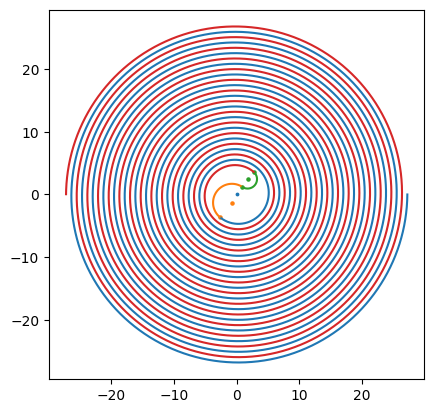

In [29]:
plt.plot(*s1)
plt.plot(*s2)
plt.plot(*s3)
plt.plot(*s4)
plt.scatter(0, 0, s=3)
plt.scatter(*list(zip(pt1, po1)), s=5)
plt.scatter(*list(zip(pt3, po2, pt2)), s=5)
plt.gca().set_aspect('equal', adjustable='box')

将所有曲线写成分段函数（从A点开始为 $T_0=0$）为：

$$\begin{align*} S(t) &=
    \begin{cases}S_1(t - T_0) &, T_0 \le t < T_1 \\
    S_2(t - T_1) &, T_1 \le t < T_2 \\
    S_3(t - T_2) &, T_2 \le t < T_3 \\
    S_4(t - T_3) &, T_3 \le t \\
    \end{cases}
\end{align*}$$

最终曲线（从 $p_{t1}$ 开始为 $T_0=0$）为：

$$\begin{align*} S(t) &=
    \begin{cases}
    S_1(t + T_1 - T_0) &, T_0 - T_1 \le t < T_0 \\
    S_2(t) &, T_0 \le t < T_2 - T_1 \\
    S_3(t + T_1 - T_2) &, T_2 - T_1 \le t < T_3 - T_1 \\
    S_4(t + T_1 - T_3) &, T_3 - T_1 \le t \\
    \end{cases}
\end{align*}$$

In [30]:
def func_S(t):
    if T0 <= t and t < T1:
        return S1(t - T0)
    elif T1 <= t and t < T2:
        return S2(t - T1)
    elif T2 <= t and t < T3:
        return S3(t - T2)
    elif T3 <= t:
        return S4(t - T3)
    else:
        raise ValueError('t is out of range')

In [31]:
def func_SS(t):
    if T0 - T1 <= t and t < T0:
        return S1(t + T1 - T0)
    elif T0 <= t and t < T2 - T1:
        return S2(t)
    elif T2 - T1 <= t and t < T3 - T1:
        return S3(t + T1 - T2)
    elif T3 - T1 <= t:
        return S4(t + T1 - T3)
    else:
        raise ValueError('t is out of range')

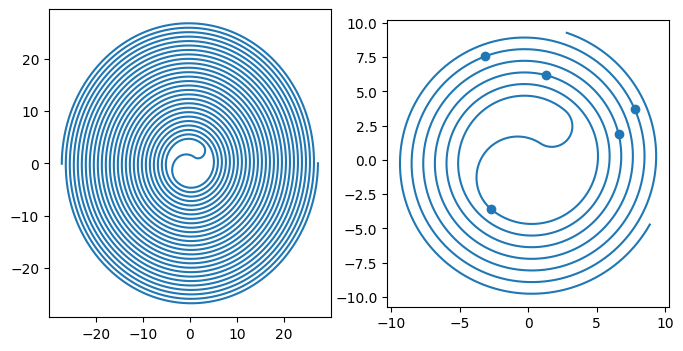

In [32]:
t_range1 = np.arange(0, T3 + T1+0.1, 0.1)
t_range2 = np.arange(-150, 150+0.1, 0.1)
t_range3 = np.array([-100, -50, 0, 50, 100])
S_s = [func_S(_) for _ in t_range1]
SS_s = [func_SS(_) for _ in t_range2]
SS_p = [func_SS(_) for _ in t_range3]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(*list(zip(*S_s)))
plt.subplot(1, 2, 2)
plt.plot(*list(zip(*SS_s)))
plt.scatter(*list(zip(*SS_p)))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

- 速度

盘入螺线斜率：

$$S_1'(t): \left[\begin{matrix} x'(t) \\ y'(t) \end{matrix} \right] = b \left[\begin{matrix} \cos \theta - \theta \sin \theta \\ \sin \theta + \theta \cos \theta \end{matrix} \right] \theta'(t)， 0 \le t < T_1$$

$$K_1(t) = \frac{-1}{-1} \frac{\sin\theta +\theta \cos\theta}{\cos\theta -\theta \sin\theta }, \theta = \theta(t)$$

第一段圆弧斜率：

$$\begin{align*} S_2'(t): \left[ \begin{matrix} x'(t) \\ y'(t) \end{matrix} \right] &= -\frac{v}{r_1} \left[ \begin{matrix} \sin(\frac{vt}{r_1}) & -\cos(\frac{vt}{r_1}) \\ \cos(\frac{vt}{r_1}) & \sin(\frac{vt}{r_1}) \end{matrix} \right] \left[ \begin{matrix} x_{t1} - x_{o1} \\ y_{t1} - y_{o1} \end{matrix} \right], 0 \le t < T_2 - T_1 \\
\end{align*}$$

$$K_2(t) = \frac{-1}{-1} \frac{\cos \left( \frac{vt}{r_1} \right) \left(x_{t1} - x_{o1} \right) + \sin \left( \frac{vt}{r_1} \right) \left( y_{t1} - y_{o1} \right)}{\sin \left( \frac{vt}{r_1} \right) \left(x_{t1} - x_{o1} \right) - \cos \left( \frac{vt}{r_1} \right) \left( y_{t1} - y_{o1} \right)}$$

第二段圆弧斜率：

$$\begin{align*} S_3'(t): \left[ \begin{matrix} x'(t) \\ y'(t) \end{matrix} \right] &= -\frac{v}{r_2} \left[ \begin{matrix} \sin(\frac{vt}{r_2}-\phi_2) & \cos(\frac{vt}{r_2}-\phi_2) \\ -\cos(\frac{vt}{r_2}-\phi_2) & \sin(\frac{vt}{r_2}-\phi_2) \end{matrix} \right] \left[ \begin{matrix} x_{t2} - x_{o2} \\ y_{t2} - y_{o2} \end{matrix} \right], 0 \le t < T_3 - T_2 \\
\end{align*}$$

$$K_3(t) = \frac{-1}{-1} \frac{- \cos \left( \frac{vt}{r_2} \right) \left(x_{t2} - x_{o2} \right) + \sin \left( \frac{vt}{r_2} \right) \left( y_{t2} - y_{o2} \right)}{\sin \left( \frac{vt}{r_2} \right) \left(x_{t2} - x_{o2} \right) + \cos \left( \frac{vt}{r_2} \right) \left( y_{t2} - y_{o2} \right)}$$

盘出螺线斜率：

$$S_4'(t): \left[\begin{matrix} x'(t) \\ y'(t) \end{matrix} \right] = - b \left[\begin{matrix} \cos \theta + \theta \sin \theta \\ \sin \theta + \theta \cos \theta \end{matrix} \right] \theta'(T_1 - t), 0 \le t$$

$$K_4(t) = \frac{-1}{-1} \frac{\sin\theta +\theta \cos\theta}{\cos\theta -\theta \sin\theta }, \theta = \theta(T_1 - t)$$

In [33]:
def K1(t=None, theta=None):
    assert t or theta
    theta = func_theta(t) if theta is None else theta
    y_ = np.sin(theta) + theta * np.cos(theta)
    x_ = np.cos(theta) - theta * np.sin(theta)
    return -y_, -x_

def K2(t):
    y_ = np.cos(v*t/r1) * (xt1 - xo1) + np.sin(v*t/r1) * (yt1 - yo1)
    x_ = np.sin(v*t/r1) * (xt1 - xo1) - np.cos(v*t/r1) * (yt1 - yo1)
    return -y_, -x_

def K3(t):
    y_ = - np.cos(v*t/r2) * (xt2 - xo2) + np.sin(v*t/r2) * (yt2 - yo2)
    x_ = np.sin(v*t/r2) * (xt2 - xo2) + np.cos(v*t/r2) * (yt2 - yo2)
    return -y_, -x_

def K4(t):
    theta = func_theta(T1 - t)
    y_ = np.sin(theta) + theta * np.cos(theta)
    x_ = np.cos(theta) - theta * np.sin(theta)
    return -y_, -x_

曲线各点的斜率为：
$$\begin{align*}
K(t) &=
    \begin{cases}
    K_1(t + T_1 - T_0) &, T_0 - T_1 \le t < T_0 \\
    K_2(t) &, T_0 \le t < T_2 - T_1 \\
    K_3(t + T_1 - T_2) &, T_2 - T_1 \le t < T_3 - T_1 \\
    K_4(t + T_1 - T_3) &, T_3 - T_1 \le t \\
    \end{cases}
\end{align*}$$

In [34]:
def func_K(t):
    if T0 - T1 <= t and t < T0:
        return K1(t + T1 - T0)
    elif T0 <= t and t < T2 - T1:
        return K2(t)
    elif T2 - T1 <= t and t < T3 - T1:
        return K3(t + T1 - T2)
    elif T3 - T1<= t:
        return K4(t + T1 - T3)
    else:
        raise ValueError('t is out of range')

In [35]:
def get_dragon_body_t(xy, pre_t, i):
    assert isinstance(i, (int, np.int64)) and 1 < i < 225, "i must be int and in (1, 224), but get {}".format(i)
    d = 2.86 if i == 2 else 1.65  # 341-55, 220-55

    # def func(t):
    #     x, y = func_SS(t)
    #     # return abs((x - xy[0])**2 + (y - xy[1])**2 - d**2)
    #     return abs(((x - xy[0])**2 + (y - xy[1])**2)**0.5 - d)
    # now_t = minimize(func, pre_t-v, bounds=[(pre_t-2*v, pre_t)]).x[0]
    # return now_t

    def func(t):
        x, y = func_SS(t)
        return ((x - xy[0])**2 + (y - xy[1])**2)**0.5 - d
        # return abs(((x - xy[0])**2 + (y - xy[1])**2)**0.5 - d)
    now_t = fsolve(func, pre_t-v)[0]
    return now_t

In [36]:
sites = 224
step = 1
time_begin = -100
time_size = 201
time_max = time_begin + time_size
time_range = np.arange(time_begin, time_max, step)
site_range = np.arange(1, sites+1)
info_th = np.zeros((sites, len(time_range)))  # theta
info_kt = np.zeros((sites, len(time_range), 2)) # kt
info_xy = np.zeros((sites, len(time_range), 2))  # xy
info_k = np.zeros((sites, len(time_range), 2))  # k
info_at_kt = np.zeros((sites, len(time_range)))  # arctan2(kt)
info_at_k = np.zeros((sites, len(time_range)))  # arctan2(k)
info_alpha = np.zeros((sites, len(time_range)))  # alpha
info_v = np.zeros((sites, len(time_range)))  # v
info_th.fill(np.nan)
info_kt.fill(np.nan)
info_xy.fill(np.nan)
info_k.fill(np.nan)
info_at_kt.fill(np.nan)
info_at_k.fill(np.nan)
info_alpha.fill(np.nan)
info_v.fill(np.nan)

In [37]:
for t_idx, t in enumerate(tqdm.tqdm(time_range)):
    pre_xy = pre_kt = None
    now_xy = now_kt = None
    for i_idx, i in enumerate(site_range):
        if i == 1:
            now_t = t
            info_v[i_idx, t_idx] = now_v = v
            now_xy = func_SS(t)  # 位置
            info_xy[i_idx, t_idx] = now_xy  # 位置
            info_kt[i_idx, t_idx] = now_kt = func_K(t)  # 切向斜率
            info_at_kt[i_idx, t_idx] = now_at_kt = np.arctan2(*now_kt)  # 切向斜率的角度
            info_k[i_idx, t_idx] = now_k = 0  # 斜率
            info_at_k[i_idx, t_idx] = now_at_k = 0  # 斜率的角度
            info_alpha[i_idx, t_idx] = now_alpha = 0  # 两斜率夹角
        else:
            now_t = get_dragon_body_t(pre_xy, pre_t, i)
            now_xy = func_SS(now_t)
            info_xy[i_idx, t_idx] = now_xy
            info_kt[i_idx, t_idx] = now_kt = func_K(now_t)
            info_at_kt[i_idx, t_idx] = now_at_kt = np.arctan2(*now_kt)
            info_k[i_idx, t_idx] = now_k = (pre_xy[1]-now_xy[1], pre_xy[0]-now_xy[0])
            info_at_k[i_idx, t_idx] = now_at_k = np.arctan2(*now_k)
            info_alpha[i_idx, t_idx] = now_alpha = abs(now_at_kt - now_at_k)
            if i == 2:
                info_k[i_idx, t_idx] = pre_k = now_k
                info_at_k[i_idx, t_idx] = pre_at_k = now_at_k
                info_alpha[i_idx-1, t_idx] = pre_alpha = now_alpha
            info_v[i_idx, t_idx] = now_v = pre_v * np.cos(pre_alpha) / np.cos(now_alpha)
        pre_t, pre_xy, pre_kt, pre_k, pre_alpha, pre_v = \
            now_t, now_xy, now_kt, now_k, now_alpha, now_v

  0%|          | 0/201 [00:00<?, ?it/s]

100%|██████████| 201/201 [01:17<00:00,  2.59it/s]


In [38]:
info_v_max = np.nan_to_num(info_v, 0).max()
row_idx, col_idx = np.where(info_v == info_v_max)
v_max_idx = np.stack((row_idx, col_idx)).T
info_v_max, v_max_idx

(1.155249340011576, array([[ 45, 185]]))

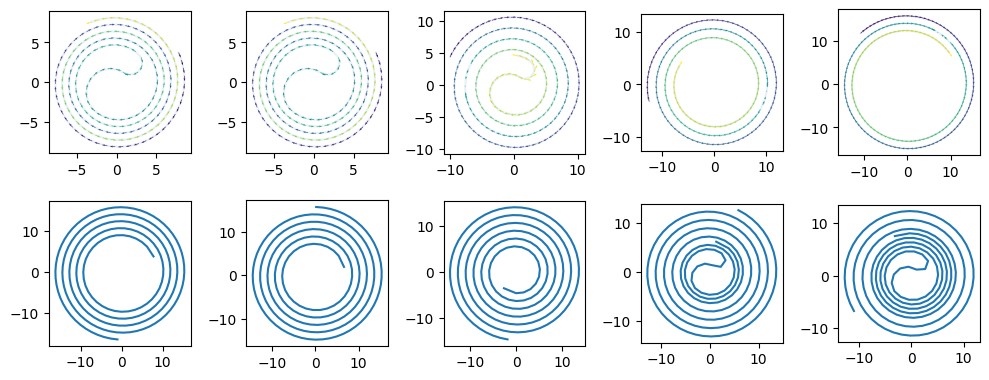

In [39]:
plt.figure(figsize=(10, 4))

plt.subplot(2, 5, 1)
plot_head()
plt.subplot(2, 5, 2)
plot_body(None, i=1)
plt.subplot(2, 5, 3)
plot_body(None, i=51)
plt.subplot(2, 5, 4)
plot_body(None, i=101)
plt.subplot(2, 5, 5)
plot_body(None, i=201)

plt.subplot(2, 5, 6)
plot_dragon_time(None, t=-100)
plt.subplot(2, 5, 7)
plot_dragon_time(None, t=-50)
plt.subplot(2, 5, 8)
plot_dragon_time(None, t=0)
plt.subplot(2, 5, 9)
plot_dragon_time(None, t=50)
plt.subplot(2, 5, 10)
plot_dragon_time(None, t=100)

plt.tight_layout()
plt.show()

## 4.2.结论

不能调整

## 4.3.讨论

假如掉头空间可以用于盘入盘出，那么可以调整：在不发生碰撞的前提下，将掉头空间部分空间用于可以调整圆弧半径，可以使得圆弧半径更小，从而使得圆弧长度更小

$$\begin{align*}
\min_{r_1} & l_1, t \in [t_0, \infty ) \\
\text{s.t.} & \begin{cases} t_i < t_{i+1} \end{cases} \\
\end{align*}
$$

# 5. 问题5

$$
\begin{align*}
\max_{v} & \left|\max(v_i) - 2\right|, t \in [-100, 100] \\
\text{s.t.} & \begin{cases} t_i < t_{i+1} \end{cases} \\
\end{align*}
$$

# 6. 证明

## 6.1.

略

## 6.2.

略

## 6.3.

略

## 6.4.

# 7. 其他

直角坐标系曲率：

$$\begin{align*}\kappa(\theta) &= \frac{\left| \dot{x} \ddot{y} - \dot{y} \ddot{x} \right|}{(\dot{x}^2 + \dot{y}^2)^{3/2}} \\
&= \frac{2 \pi}{p} \frac{
    \left| 
        \left(\cos\theta - \theta \sin\theta \right) \left(2 \cos\theta - \theta \sin\theta \right)
        - \left(\sin\theta + \theta \cos\theta \right) \left(- 2 \sin\theta - \theta \cos\theta \right) \right|
    }{
        \left(\left(\cos\theta - \theta \sin\theta \right)^2 + \left(\sin\theta + \theta \cos\theta \right)^2 \right)^{3/2}
    } \\
&= \frac{2 \pi}{p} \frac{
    \left| 
        \left(2\cos^2\theta - \theta \sin\theta \cos\theta - 2\theta \sin\theta \cos\theta + \theta^2 \sin^2\theta \right)
        + \left(2\sin^2\theta + \theta \sin\theta \cos\theta + 2\theta \sin\theta \cos\theta + \theta^2 \cos^2\theta \right)
    \right|
    }{
        \left(\cos^2\theta + \theta^2 \sin^2\theta - 2\theta \sin\theta \cos\theta + \sin^2\theta + \theta^2 \cos^2\theta + 2\theta \sin\theta \cos\theta  \right)^{3/2}
    } \\
&= \frac{2 \pi}{p} \frac{\theta^2 + 2}{ (\theta^2 + 1)^{3/2}} \\
\end{align*}$$

极坐标系曲率：

$$\begin{align*}
\kappa(\theta) &= \frac{r^2 + 2 \dot{r}^2 - r \ddot{r}}{(r^2 + \dot{r}^2)^{3/2}} \\
&= \frac{(b\theta)^2 + 2 (b)^2 - (b\theta) \cdot 0}{((b\theta)^2 + (b)^2)^{3/2}} \\
&= \frac{(b)^2 (\theta^2 + 2)^2}{(b)^3 (\theta^2 + 1)^{3/2}} \\
&= \frac{2 \pi}{p} \frac{\theta^2 + 2}{ (\theta^2 + 1)^{3/2}} \\
\end{align*}$$

曲率半径：

$$\rho(\theta) = R(\theta) = \frac{1}{\kappa(\theta)} = \frac{p}{2 \pi} \frac{(\theta^2 + 1)^{3/2}}{\theta^2 + 2}$$

# END